# 实验楼 —— Python 数据可视化分析

[链接](https://www.shiyanlou.com/courses/1283/learning/?id=10760)

**介绍**

在机器学习领域中，可视化是十分重要的。在开始一项新任务时，通过可视化手段探索数据能更好地帮助人们把握数据的要点。在分析模型表现和模型报告的结果时，可视化能使分析显得更加生动鲜明。有时候，为了理解复杂的模型，我们还可以将高维空间映射为视觉上更直观的二维或三维图形。

总而言之，可视化是一个相对快捷的从数据中挖掘信息的手段。本文将使用 Pandas、Matplotlib、seaborn 等流行的库，带你上手可视化。

知识点
- 单变量可视化的常用方法
- 多变量可视化的常用方法
- t-SNE

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


最后一个数据列 Churn 离网率 是我们的目标特征，它是布尔变量，其中 True 表示公司最终丢失了此客户，False 表示客户被保留。稍后，将构建基于其他特征预测 Churn 特征的模型。

**单变量可视化**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70eead6cf8>,
      dtype=object)

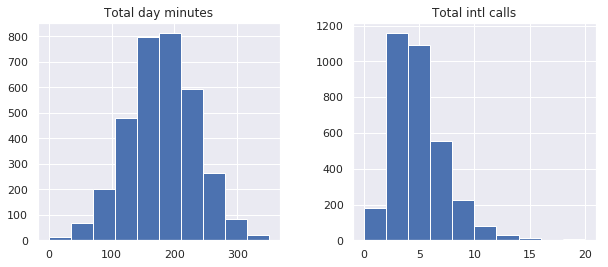

In [6]:
# bar

features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70ee75f048>,
      dtype=object)

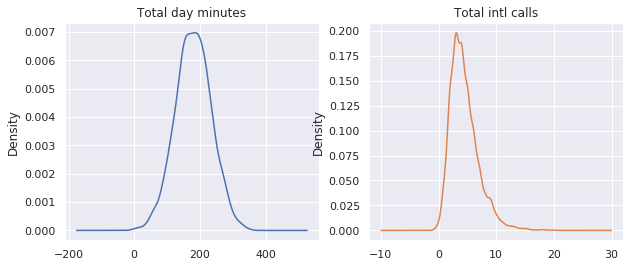

In [7]:
# density

df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4), legend=False, title=features)

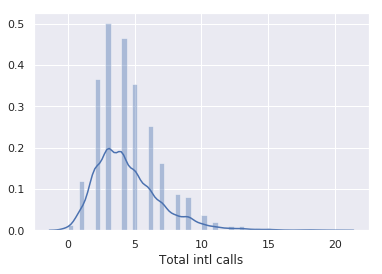

In [8]:
sns.distplot(df['Total intl calls'])

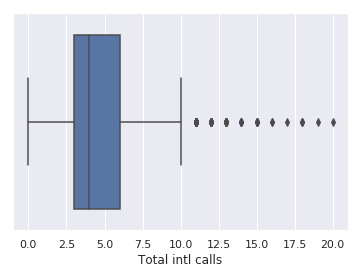

In [9]:
# boxplot

sns.boxplot(x='Total intl calls', data=df)

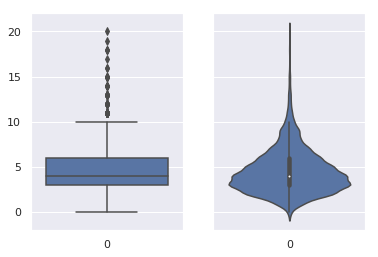

In [10]:
# violin plot

_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

In [12]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

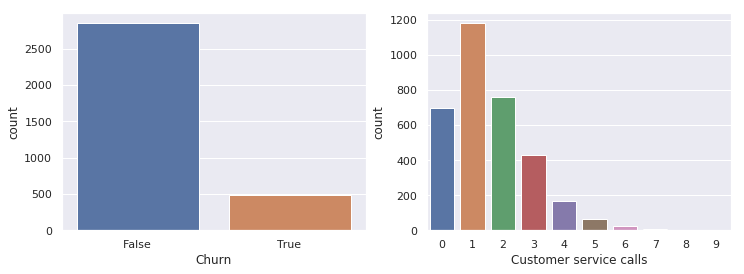

In [13]:
# countplot

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

**多变量可视化**

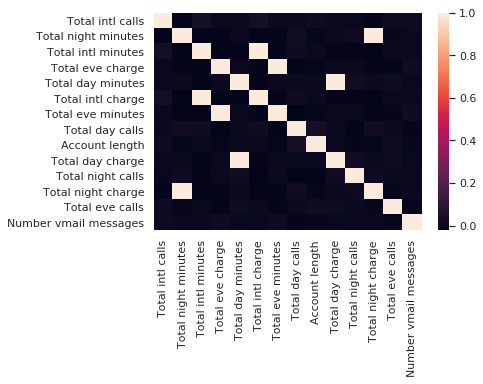

In [14]:
# 相关矩阵

# 丢弃非数值变量
numerical = list(set(df.columns) -
                 set(['State', 'International plan', 'Voice mail plan',
                      'Area code', 'Churn', 'Customer service calls']))
# 计算和绘图
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [15]:
# remove rebundant variables

numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 
                                       'Total night charge', 'Total intl charge']))

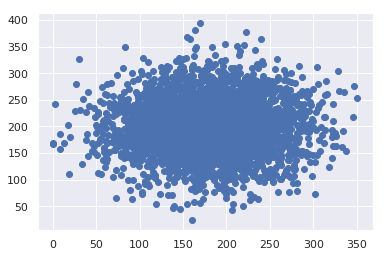

In [16]:
# scatter plot

plt.scatter(df['Total day minutes'], df['Total night minutes'])

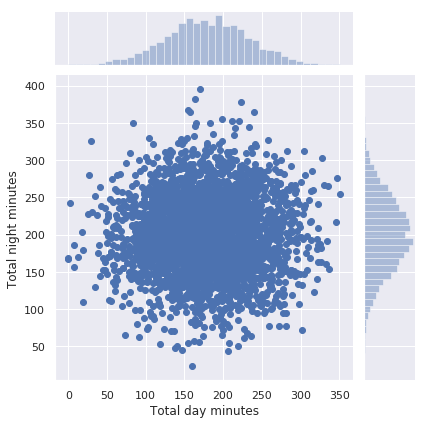

In [17]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter')

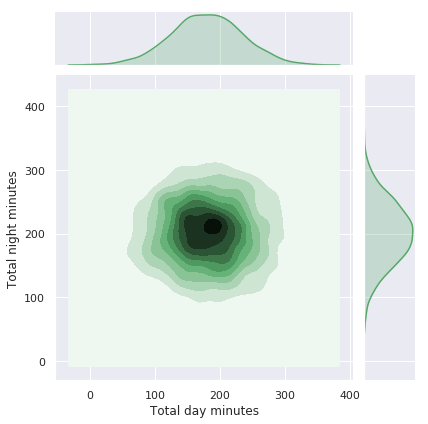

In [18]:
# smooth version

sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g")

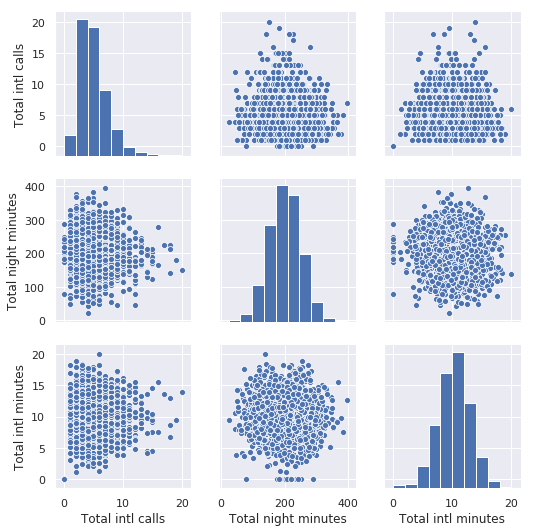

In [20]:
# scatter matrix

%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical[0:3]])

为了让图形更有趣一点，可以尝试从数值和类别特征的相互作用中得到预测 Churn 的新信息，更具体地，让我们看看输入变量和目标变量 Churn 的关系。使用  lmplot() 方法的 hue 参数来指定感兴趣的类别特征。

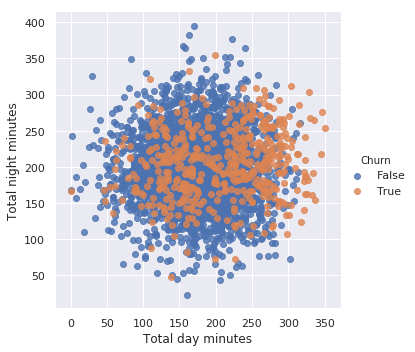

In [22]:
# 检查输入变量和标签y的关系

sns.lmplot('Total day minutes', 'Total night minutes',
           data=df, hue='Churn', fit_reg=False)

看起来不忠实客户偏向右上角，也就是倾向于在白天和夜间打更多电话的客户。当然，这不是非常明显，我们也不会基于这一图形下任何确定性的结论。

现在，创建箱形图，以可视化忠实客户（Churn=0）和离网客户（Churn=1）这两个互斥分组中数值变量分布的统计数据。

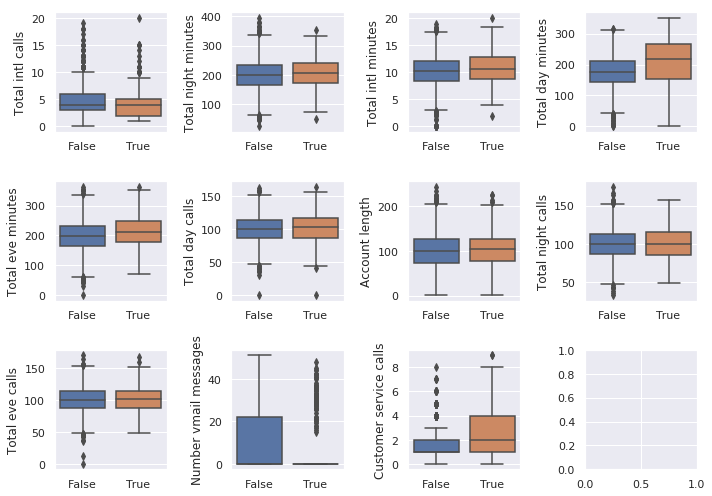

In [23]:
# 有时我们可以将有序变量作为数值变量分析
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

上面的图表表明，两组之间分歧最大的分布是这三个变量：Total day minutes 日通话分钟数、Customer service calls 客服呼叫数、Number vmail messages 语音邮件数。在后续的课程中，我们将学习如何使用随机森林（Random Forest）或梯度提升（Gradient Boosting）来判定特征对分类的重要性，届时可以清晰地看到，前两个特征对于离网预测模型而言确实非常重要。

创建箱型图和提琴形图，查看忠实客户和不忠实客户的日通话分钟数。

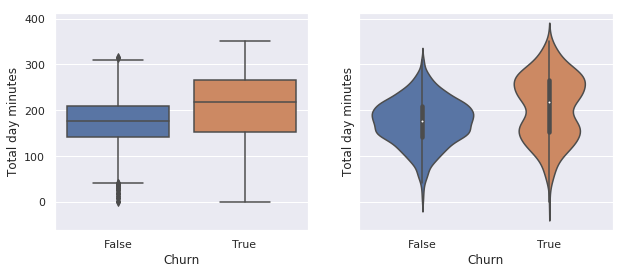

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

上图表明，不忠实客户倾向于打更多的电话。

我们还可以发现一个有趣的信息：平均而言，离网客户是通讯服务更活跃的用户。或许是他们对话费不满意，所以预防离网的一个可能措施是降低通话费。当然，公司需要进行额外的经济分析，以查明这样做是否真的有利。

当想要一次性分析两个类别维度下的数量变量时，可以用 seaborn 库的  catplot() 函数。例如，在同一图形中可视化 Total day minutes 日通话分钟数 和两个类别变量（Churn 和 Customer service calls）的相互作用。

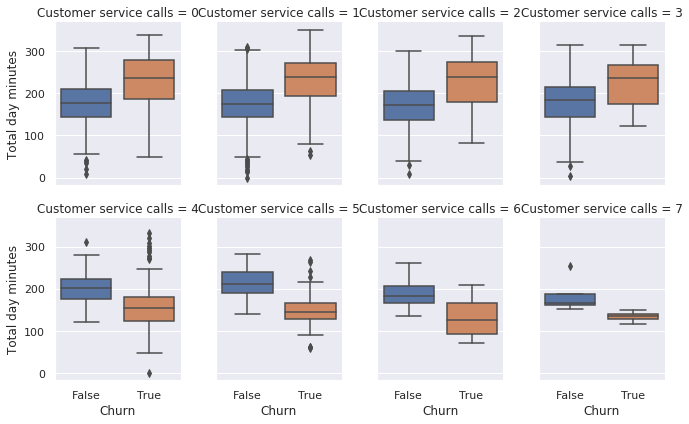

In [25]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
            data=df[df['Customer service calls'] < 8], kind="box",
            col_wrap=4, height=3, aspect=.8)

上图表明，从第 4 次客服呼叫开始，Total day minutes 日通话分钟数 可能不再是客户离网（Churn==1）的主要因素。也许，除了我们之前猜测的话费原因，还有其他问题导致客户对服务不满意，这可能会导致日通话分钟数更少。

**类别与类别**

正如之前提到的，变量 Customer service calls 客服呼叫数 的重复值很多，因此，既可以看成数值变量，也可以看成有序类别变量。之前已通过计数图（count plot）查看过它的分布了，现在我们感兴趣的是这一有序特征和目标变量 Churn 离网率 之间的关系。

使用 countplot() 方法查看客服呼叫数的分布，这次传入 hue=Churn 参数，以便在图形中加入类别维度。

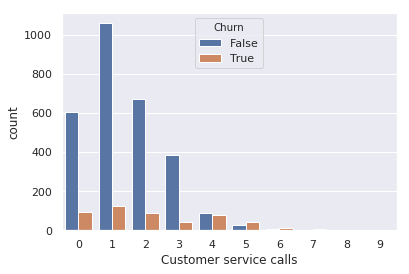

In [26]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

上图表明，呼叫客服达到 4 次以上后，离网率显著增加了。

使用 countplot() 方法查看 Churn 离网率 和二元特征 International plan 国际套餐、Voice mail plan 语音邮件套餐 的关系。

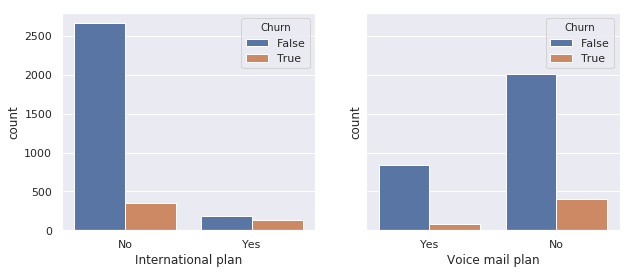

In [27]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

上图表明，开通国际套餐后，离网率会高很多，即 International plan 是否开通国际套餐 是一个重要的特征。我们在 Vocie mail plan 语音邮件套餐 特征上没有观察到类似的效果。

**交叉表**

除了使用图形进行类别分析之外，还可以使用统计学的传统工具：交叉表（cross tabulation），即使用表格形式表示多个类别变量的频率分布。通过它可以查看某一列或某一行以了解某个变量在另一变量的作用下的分布情况。

通过交叉表查看 Churn 离网率 和类别变量 State 州 的关系。

In [28]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


上表显示，State 州 有 51 个不同的值，并且每个州只有 3 到 17 个客户抛弃了运营商。通过 groupby() 方法计算每个州的离网率，由高到低排列。


In [31]:
df.groupby(['State'])['Churn'].agg(
    [np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


上表显示，新泽西和加利福尼亚的离网率超过了 25%，夏威夷和阿拉斯加的离网率则不到 6%。然而，这些结论是基于极少的样本得出的，可能仅适用于这一特定数据集，不太具有泛用性。

我们一直在研究数据集的不同方面（facet），通过猜测有趣的特征并一次选择少量特征进行可视化。如果我们想一次性显示所有特征并仍然能够解释生成的可视化，该怎么办？

**降维**

大多数现实世界的数据集有很多特征，每一个特征都可以被看成数据空间的一个维度。因此，我们经常需要处理高维数据集，然而可视化整个高维数据集相当难。为了从整体上查看一个数据集，需要在不损失很多数据信息的前提下，降低用于可视化的维度。这一任务被称为降维（dimensionality reduction）。降维是一个无监督学习（unsupervised learning）问题，因为它需要在不借助任何监督输入（如标签）的前提下，从数据自身得到新的低维特征。

主成分分析（Principal Component Analysis, PCA）是一个著名的降维方法，我们会在之后的课程中讨论它。但主成分分析的局限性在于，它是线性（linear）算法，这意味着对数据有某些特定的限制。

与线性方法相对的，有许多非线性方法，统称流形学习（Manifold Learning）。著名的流形学习方法之一是 t-SNE。

**t-SNE**

它的基本思路很简单：为高维特征空间在二维平面（或三维平面）上寻找一个投影，使得在原本的 n 维空间中相距很远的数据点在二维平面上同样相距较远，而原本相近的点在平面上仍然相近。

In [32]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

去除 State 州 和 Churn 离网率 变量，然后用  pandas.Series.map() 方法将二元特征的「Yes」/「No」转换成数值。 :



In [34]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

使用 StandardScaler() 方法来完成归一化数据，即从每个变量中减去均值，然后除以标准差。



In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

现在可以构建 t-SNE 表示了。



In [36]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

然后以图形的方式可视化。


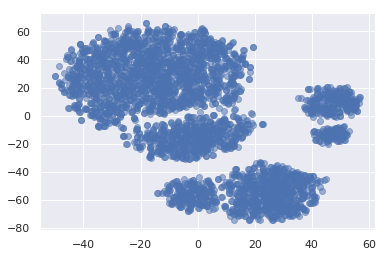

In [37]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5)

根据离网情况给 t-SNE 表示加上色彩（蓝色表示忠实用户，黄色表示不忠实用户），形成离网情况散点图。



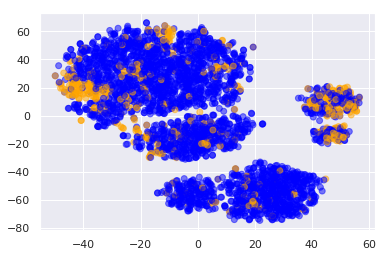

In [38]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5)

可以看到，离网客户集中在低维特征空间的一小部分区域。为了更好地理解这一图像，可以使用剩下的两个二元特征，即 International plan 国际套餐 和 Voice mail plan 语音邮件套餐 给图像着色，蓝色代表二元特征的值为 Yes，黄色代表二元特征的值为 No。



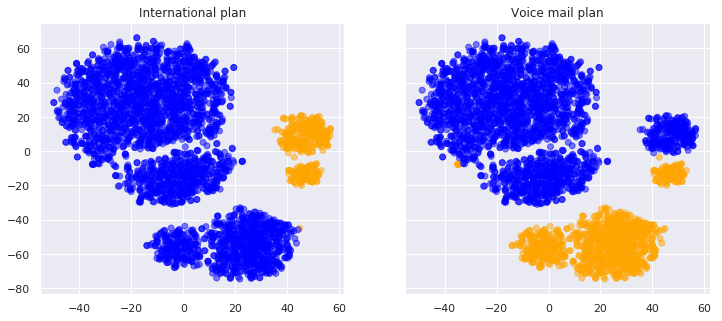

In [39]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5)
    axes[i].set_title(name)

通过上面 3 张图，我们就可以更直观的分析客户的离网原因了。

最后，了解下 t-SNE 的缺陷。

- 计算复杂度高。如果你有大量样本，你应该使用  Multicore-TSNE。

- 随机数种子的不同会导致图形大不相同，这给解释带来了困难。通常而言，你不应该基于这些图像做出任何决定性的结论，因为它可能和单纯的猜测差不多。当然，t-SNE 图像中的某些发现可能会启发一个想法，这个想法可以通过更全面深入的研究得到确认。